In [1]:
## Name:Fizzah Nasir
## Roll Number:261927366

In [120]:
%matplotlib inline

# **Programming Assignment 02**


### Introduction

In this assignment, you will be creating your first Machine Learning model from scratch: K-Nearest Neighbors.

This algorithm is one of the simpler ones you will come across, but the ideas can be applied to large-scale sophisticated systems: Semantic Search and Recommendation Systems for starters.

For this assignment, you will be creating your own KNN-classifier from scratch using `numpy`.

You are provided with the body performance dataset and will need to:
- Implement the KNN algorithm from scratch (Part 1)
- Evaluate its performance using cross-validation and different distance metrics
- Compare your implementation with a built-in version from `sklearn` (Part 2)

### Instructions

- Follow along with the notebook, filling out the necessary code where instructed.

- <span style="color: red;">Read the Plagiarism Policy of FCCU.</span>

- <span style="color: red;">Make sure to run all cells for credit.</span>

- <span style="color: red;">Do not remove any pre-written code.</span> We will be using the `print` statements to grade your assignment.

- <span style="color: red;">You must attempt all parts.</span> Do not assume that because something is for 0 marks, you can leave it - it will definitely be used in later parts.

- <span style="color: red;">Do not use unauthorized libraries.</span> You are not allowed to use `sklearn` in Part 1. Failure to follow these instructions will result in a serious penalty.

## **Part 1: K-Nearest Neighbors (KNN) from Scratch [75 marks]**
In this you will implement the K-Nearest Neighbors (KNN) algorithm from scratch and apply it to the dataset.

## Dataset: Body Performance Dataset
    age : 20 ~64
    gender : F,M
    height_cm : (If you want to convert to feet, divide by 30.48)
    weight_kg
    body fat_%
    diastolic : diastolic blood pressure (min)
    systolic : systolic blood pressure (min)
    gripForce
    sit and bend forward_cm
    sit-ups counts
    broad jump_cm
    class : A,B,C,D ( A: best) / stratified

## Tasks for Part 1
- Load the dataset
- Implement a train-test split
- Implement the Euclidean and Manhattan distance function
- Write the k-NN classifier
- Evaluate the accuracy
- Display Results

Again, you are <span style="color: red;">not allowed</span> to use scikit-learn or any other machine learning toolkit for this part. You have to implement your own k-NN classifier from scratch.

You can use the following libraries for this part or other standard python libraries:
- `numpy` for numerical operations
- `pandas` for dataset handling
- `matplotlib` for plotting the results

### Importing Libraries

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Load the Body Performance Dataset
You can use the `pandas` library to load the CSV file but the final dataset should be stored in a `numpy` array.

`Features:` age, gender , height_cm, weight_kg, body fat_%, diastolic, systolic, gripForce, sit and bend forward_cm, sit-ups counts, broad jump_cm


`Labels:` class : A,B,C,D ( A: best) / stratified

In [124]:
# Load the dataset (replace 'bodyPerformance.csv' with your file path)
data = pd.read_csv('bodyPerformance.csv')

data['gender'] = data['gender'].map({'F': 0, 'M': 1})
data['class'] = data['class'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3})

features = data.drop('class', axis=1).values
labels = data['class'].values

# Display first 5 rows
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
    age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0       1      172.3      75.24        21.3       80.0     130.0   
1  25.0       1      165.0      55.80        15.7       77.0     126.0   
2  31.0       1      179.6      78.00        20.1       92.0     152.0   
3  32.0       1      174.5      71.10        18.4       76.0     147.0   
4  28.0       1      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  class  
0       54.9                     18.4            60.0          217.0      2  
1       36.4                     16.3            53.0          229.0      0  
2       44.8                     12.0            49.0          181.0      2  
3       41.4                     15.2            53.0          219.0      1  
4       43.5                     27.1            45.0          217.0      1  


## Step 2: Train-Test Split
You can use the `numpy` to manually split the dataset into training and testing sets (80% train, 20% test). You can shuffle the dataset randomly to avoid any bias in splitting. Separate features and labels to ensure that the model learns only from the input data and that its performance can be evaluated objectively on unseen data.

In [145]:
# Shuffle the dataset (Optional)
data = data.sample(frac = 1).reset_index(drop=True)
# Split 80% for training and 20% for testing
split_idx = int(0.8 * len(features))

# Separate features and labels for both train and test data
X_train, X_test = features[:split_idx], features[split_idx:]
y_train, y_test = labels[:split_idx], labels[split_idx:]

# Print the 4 arrays
print("X_train:\n",X_train)
print("y_train:\n",y_train)

print("X_test:\n",X_test)
print("y_test:\n",y_test)

print(f"Training features shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

X_train:
 [[ 27.    1.  172.3 ...  18.4  60.  217. ]
 [ 25.    1.  165.  ...  16.3  53.  229. ]
 [ 31.    1.  179.6 ...  12.   49.  181. ]
 ...
 [ 28.    1.  166.  ...  20.6  55.  223. ]
 [ 29.    1.  166.8 ...  23.5  63.  223. ]
 [ 56.    1.  166.3 ...  15.8  29.  195. ]]
y_train:
 [2 0 2 ... 0 0 1]
X_test:
 [[ 29.    1.  170.9 ...  18.8  40.  227. ]
 [ 29.    0.  165.6 ...  15.8  39.  157. ]
 [ 30.    1.  171.6 ...  15.1  67.  181. ]
 ...
 [ 39.    1.  177.2 ...  16.4  45.  229. ]
 [ 64.    0.  146.1 ...   9.2   0.   75. ]
 [ 34.    1.  164.  ...   7.1  51.  180. ]]
y_test:
 [2 1 0 ... 0 3 2]
Training features shape: (10714, 11)
Training labels shape: (10714,)
Testing features shape: (2679, 11)
Testing labels shape: (2679,)


## Step 3: Implement Distance Function

Implement separate functions for the Euclidean and Manhattan distances. Formulas for both are given below.

$$
d_{\text{Euclidean}}(\vec{p},\vec{q}) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2 + ... + (p_n - q_n)^2}
$$

$$
d_{\text{Manhattan}}(\vec{p},\vec{q}) = |(p_1 - q_1)| + |(p_2 - q_2)| + |(p_3 - q_3)| + ... + |(p_n - q_n)|
$$

In [146]:
# Implement the euclidean distance function

def euclidean_distance(vector1,vector2):

    return np.sqrt(np.sum((vector1 - vector2) ** 2))

# Implement the Manhattan distance function

def manhattan_distance(vector1,vector2):

    return np.sum(np.abs(vector1 - vector2))

In [148]:
test_point = x_test.iloc[0]
distances_euclidean = []
for index, train_point in x_train.iterrows():
    distance = euclidean_distance(test_point, train_point)
    distances_euclidean.append((index, distance)) 
print("euclidean_distances:\n",distances_euclidean[0:5])




euclidean_distances:
 [(10635, np.float64(140.5199615713013)), (5496, np.float64(91.76360934488137)), (13055, np.float64(75.00919943580254)), (11826, np.float64(44.501123581320954)), (1326, np.float64(55.05297448821453))]


In [149]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
print("Euclidean:", euclidean_distance(v1, v2))
print("Manhattan:", manhattan_distance(v1, v2))

Euclidean: 5.196152422706632
Manhattan: 9


In [150]:
test_point = x_test.iloc[0]
distances_manhattan = []
for index, train_point in x_train.iterrows():
    distance = euclidean_distance(test_point, train_point)
    distances_manhattan.append((index, distance)) 
print("manhattan_distances:\n",distances_manhattan[0:5])

manhattan_distances:
 [(10635, np.float64(140.5199615713013)), (5496, np.float64(91.76360934488137)), (13055, np.float64(75.00919943580254)), (11826, np.float64(44.501123581320954)), (1326, np.float64(55.05297448821453))]


## Step 4: k-NN Classifier methods

Complete the following method functions:

1. `fit`

2. `get_neighbours`


3. `predict`

You can make as many helper functions as you need.


In [151]:
class KNNClassifier:
    def __init__(self, k=3, distance_metric=euclidean_distance):
        """
        Initialize the k-NN classifier with the value of k.

        Parameters:
        k (int): Number of nearest neighbors to consider.
        """


        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def get_neighbours(self, test_point):
        distances = []
        for i, x in enumerate(self.X_train):
            dist = self.distance_metric(test_point, x)
            distances.append((dist, self.y_train[i]))
        distances.sort(key=lambda x: x[0])
        neighbours = [dist[1] for dist in distances[:self.k]]
        return neighbours
    
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            neighbours = self.get_neighbours(x)
            counts = np.bincount(neighbours)
            pred = np.argmax(counts)
            predictions.append(pred)
        return np.array(predictions)

In [152]:
def fit(self, features, labels):
        """
        Store the training data (features and labels).

        Parameters:
        features (ndarray): The feature matrix of the training data.
        labels (ndarray): The labels corresponding to the training data.
        """

        self.X_train = features
        self.y_train = labels

In [153]:
def get_neighbours(self, test_point):
        """
        Find the k-nearest neighbors of the test point based on Euclidean distance.

        Parameters:
        test_point (ndarray): A single test data point for which neighbors are to be found.

        Returns:
        k_neighbors (list): The k nearest neighbors' labels.
        """
        distances = []
        for i, x in enumerate(self.X_train):
            dist = self.distance_metric(test_point, x)
            distances.append((dist, self.y_train[i]))
        distances.sort(key=lambda x: x[0])
        neighbours = [dist[1] for dist in distances[:self.k]]
        return neighbours

In [154]:
def predict(self, test_data):
        """
        Predict the class labels for the test data.

        Parameters:
        test_data (ndarray): The feature matrix of the test data.

        Returns:
        predictions (list): The predicted class labels for each test data point.
        """
        predictions = []
        for x in X_test:
            neighbours = self.get_neighbours(x)
            counts = np.bincount(neighbours)
            pred = np.argmax(counts)
            predictions.append(pred)
        return np.array(predictions)

## Step 5: Evaluating the Model

Now that you've created a model and "trained" it, you can move on to the Evaluation phase.

- Implement an `evaluate` function that computes the Confusion Matrix, Accuracy, and Macro-Average F1 score of your classifier.
- The function should take as input the predicted labels and the true labels. This will be built in steps: its easier to create a Confusion Matrix, then calculate things like the Precision, Recall and F1 from it.

- We will also implement a function that displays our confusion matrix as a heatmap annotated with the data values.
- The axes should be properly labelled and the colormap used needs to be shown next to the heatmap.
- You can have a look at some examples of heatmaps [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html). (You don't have to use the seaborn libray, but it has some pretty colour palettes to choose from.)

We recommend that you do not use hard coding in this function.

In [155]:
# Implement a function to calculate accuracy

def calculate_accuracy(predicted_labels, true_labels):
    '''
    Returns the accuracy of the predictions against the true labels

    Parameters
    ----------
    predicted_labels : array

    true_labels : array
    """
    '''
    return np.mean(np.array(predicted_labels) == np.array(true_labels))

In [156]:
import numpy as np
import pandas as pd

# Your original function
def make_confusion_matrix(predicted, true):
    '''
    Computes the confusion matrix as a 2D array
    
    Parameters:
    predicted : array-like - Predicted class labels (0 to n_classes-1)
    true : array-like - True class labels (0 to n_classes-1)
    
    Returns:
    numpy.ndarray - Confusion matrix where rows=true, columns=predicted
    '''
    classes = np.unique(true)
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    for t, p in zip(true, predicted):
        matrix[t, p] += 1
    return matrix

# Example data - medical test predictions vs actual conditions
np.random.seed(42)
true_conditions = np.random.randint(0, 4, 100)  # 4 disease classes (0-3)
model_predictions = np.clip(true_conditions + np.random.randint(-1, 2, 100), 0, 3)

# Compute confusion matrix
cm = make_confusion_matrix(model_predictions, true_conditions)

# Convert to readable DataFrame
class_names = ['Healthy', 'Mild', 'Moderate', 'Severe']  # Example medical conditions
cm_df = pd.DataFrame(cm, 
                    index=[f"True {name}" for name in class_names],
                    columns=[f"Pred {name}" for name in class_names])

print("Confusion Matrix:")
print(cm_df)




Confusion Matrix:
               Pred Healthy  Pred Mild  Pred Moderate  Pred Severe
True Healthy             13          7              0            0
True Mild                 9          7             10            0
True Moderate             0          7              7           10
True Severe               0          0             13           17


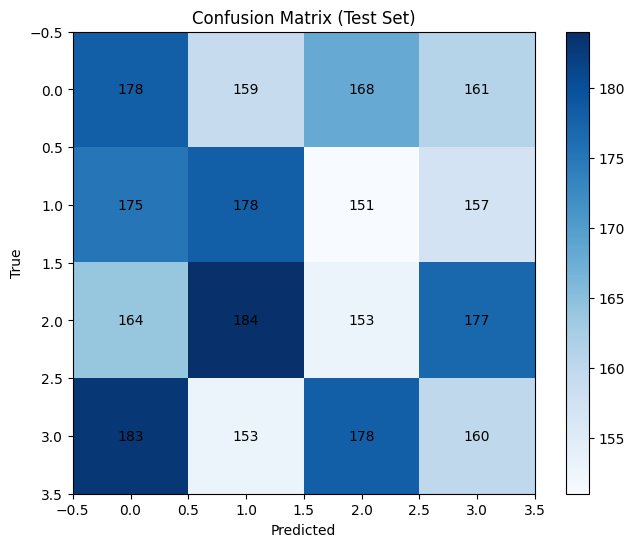

In [157]:
# Implement a funtion to display a heatmap

def make_heat_map(data, title):
    '''
    Creates a heatmap from the 2D matrix input
    '''
    plt.figure(figsize=(8,6))
    plt.imshow(data, cmap='Blues')  # Changed "matrix" to "data"
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.colorbar()
    for i in range(data.shape[0]):  # Changed "matrix" to "data"
        for j in range(data.shape[1]):  # Changed "matrix" to "data"
            plt.text(j, i, data[i, j], ha='center', va='center')
    plt.show()
    
cm = make_confusion_matrix(y_pred, y_test)
make_heat_map(cm, 'Confusion Matrix (Test Set)')

In [158]:
# Implement a function to compute the precision

def calculate_precision(matrix,class_label):
    '''
    Calculates the precision from a provided confusion matrix
    '''
    col = matrix[:, class_label]
    if np.sum(col) == 0:
        return 0
    return matrix[class_label, class_label] / np.sum(col)

print("Precision for each class:")
class_labels = ['A', 'B', 'C', 'D']
precisions = []
for i in range(4):
    prec = calculate_precision(cm, i)
    precisions.append(prec)
    print(f"{class_labels[i]}: {prec:.2f}")


Precision for each class:
A: 0.25
B: 0.26
C: 0.24
D: 0.24


In [159]:
# Implement a function to compute the recall

def calculate_recall(matrix,class_label):
    '''
    Calculates the recall from a provided confusion matrix
    '''
    row = matrix[class_label, :]
    return matrix[class_label, class_label] / np.sum(row)

print("\nRecall for each class:")
class_labels = ['A', 'B', 'C', 'D']
recalls = []
for i in range(4):
    rec = calculate_recall(cm, i)
    recalls.append(rec)
    print(f"{class_labels[i]}: {rec:.2f}")


Recall for each class:
A: 0.27
B: 0.27
C: 0.23
D: 0.24


In [160]:
# Implement a function to compute the F1 score

def calculate_f1_score(precision, recall):
    '''
    Calculates the F1 score from a provided precision and recall
    '''
    if precision + recall == 0:
        return 0.0  # To avoid division by zero; if both precision and recall are 0, return 0
    
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [161]:
print("\nF1-Scores for each class:")
class_labels = ['A', 'B', 'C', 'D']
f1_scores = []
for i in range(4):
    prec = calculate_precision(cm, i)
    rec = calculate_recall(cm, i)
    f1 = calculate_f1_score(prec, rec)
    f1_scores.append(f1)
    print(f"{class_labels[i]}: {f1:.2f}")


F1-Scores for each class:
A: 0.26
B: 0.27
C: 0.23
D: 0.24


In [162]:
# Implement a function to compute the Macro-average F1

def macro_average_f1(matrix):
    '''
    Calculates the macro-average F1 score from a provided confusion matrix, over all classes
    '''
    f1_scores = []
    for i in range(matrix.shape[0]):
        prec = calculate_precision(matrix, i)
        rec = calculate_recall(matrix, i)
        f1 = calculate_f1_score(prec, rec)
        f1_scores.append(f1)
    return np.mean(f1_scores)

macro_f1 = macro_average_f1(cm)
print(f"Macro F1 Score: {macro_f1:.2f}")

Macro F1 Score: 0.25


## Step 6: k-fold Cross Validation


Now with the basics done, you can move on to the next step: `k`-fold Cross Validation. This is a more robust way of evaluating your model since it uses all the data for training and testing (effectively giving you `k` chances to verify the generalizability of your model).

Now, implement a function that performs `k`-fold cross-validation on the training data for a specified value of `k`.

In Cross Validation, you divide the dataset into `k` parts. `k-1` parts will be used for training and `1` part will be used for validation. You will repeat this process `k` times, each time using a different part for validation. You will then average the results of each fold to get the final result. Take a look at the image above for a better understanding.

The function should return **predictions** for the **entire training data** (size of list/array should be equal to the size of the dataset). This is the result of appending the predicted labels for each validation-train split into a single list/array. Make sure the order of the predicted labels matches the order of the training dataset, so that they may directly be passed to your `evaluate` function together with the actual labels.

In [163]:
# Implement a function that creates the train and test splits based off the value of k

def k_fold_split(k, cv_no, data):
    '''
    Returns the training and validation sets for a given value of k

    Parameters
    ----------
    k : int
        The value of k
    cv_no : int
        The current fold number
    data : array
        The dataset
    '''
    fold_size = len(data) // k
    val_start = cv_no * fold_size
    val_end = (cv_no + 1) * fold_size
    val_data = data[val_start:val_end]
    train_data = np.concatenate([data[:val_start], data[val_end:]])
    return train_data, val_data

In [164]:
# Implement function to perform k-fold cross-validation, using the above function

def k_fold_cross_validation(num_folds, k, X, y, distance_metric):
    """
    Returns the predictions for all the data points in the dataset using k-fold cross validation

    num_folds: int
      Number of folds
    k: int
      Number of neighbours to consider (hyperparameter)
    dataset: array
      The dataset
    """
    fold_size = len(X) // num_folds
    predictions = np.zeros_like(y)
    for i in range(num_folds):
        start = i * fold_size
        end = (i + 1) * fold_size
        X_val = X[start:end]
        y_val = y[start:end]
        X_train = np.concatenate([X[:start], X[end:]])
        y_train = np.concatenate([y[:start], y[end:]])
        model = KNNClassifier(k, distance_metric)
        model.fit(X_train, y_train)
        pred = model.predict(X_val)
        predictions[start:end] = pred
    return predictions





## Step 7: Running the k-NN Classifier and Evaluating
Now let's predict the test data and evaluate the model.

In [176]:
# Set value of k
k = 5

# Make predictions on test data

# Calculate accuracy
k = 5
model = KNNClassifier(k, euclidean_distance)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = calculate_accuracy(y_pred, y_test)
print(f"\nTest Accuracy (Euclidean): {accuracy:.2f}")



Test Accuracy (Euclidean): 0.57


In [177]:
# Set value of k
k = 5

# Initialize KNN with Manhattan distance
model_manhattan = KNNClassifier(k, manhattan_distance)
model_manhattan.fit(X_train, y_train)

# Make predictions
y_pred_manhattan = model_manhattan.predict(X_test)

# Calculate accuracy
accuracy_manhattan = calculate_accuracy(y_pred_manhattan, y_test)
print(f"\nTest Accuracy (Manhattan): {accuracy_manhattan:.2f}")


Test Accuracy (Manhattan): 0.58


## **Part 2: K-Nearest Neighbors (KNN) using Scikit-Learn (25 marks)**
In this part, you have to use [scikit-learn's k-NN implementation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to train and test your classifier on the dataset used in Part 1.

Repeat the tasks you have done in Part 1 but this time using scikit-learn.

## Tasks for Part 2
- Load the dataset
- Preprocess the data by separating the features and labels
- Split the data into training and testing sets.
- Build a k-NN classifier using scikit-learn
- Evaluate the performance using accuracy

### Importing Libraries

In [178]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Step 1: Load the Body Performance Dataset
You can use the `pandas` library to load the CSV file but the final dataset should be stored in a `numpy` array.

`Features:` age, gender , height_cm, weight_kg, body fat_%, diastolic, systolic, gripForce, sit and bend forward_cm, sit-ups counts, broad jump_cm


`Labels:` class : A,B,C,D ( A: best) / stratified

In [167]:
# Load the Body Performance dataset
data = pd.read_csv('bodyPerformance.csv')
data['gender'] = data['gender'].map({'F': 0, 'M': 1})
data['class'] = data['class'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3})

# Display the first few rows of the dataset
print("Dataset preview:")
print(data.head())

# Separate features and labels
features = data[['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
          'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']].to_numpy()

labels = data['class'].to_numpy()

Dataset preview:
    age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0       1      172.3      75.24        21.3       80.0     130.0   
1  25.0       1      165.0      55.80        15.7       77.0     126.0   
2  31.0       1      179.6      78.00        20.1       92.0     152.0   
3  32.0       1      174.5      71.10        18.4       76.0     147.0   
4  28.0       1      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  class  
0       54.9                     18.4            60.0          217.0      2  
1       36.4                     16.3            53.0          229.0      0  
2       44.8                     12.0            49.0          181.0      2  
3       41.4                     15.2            53.0          219.0      1  
4       43.5                     27.1            45.0          217.0      1  


## Step 2: Split the Data into Training and Testing Sets

In [168]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 10714
Testing set size: 2679


## Step 3: k-NN Classifier
Implementation of k-NN using scikit-learn's built-in `KNeighborsClassifier`

In [172]:
# Create an instance of the KNeighborsClassifier with k=3

# Fit the model on the training data

# Predict the labels on the test data

k = 3

# Euclidean Distance
model_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
model_euclidean.fit(X_train, y_train)
y_pred_euclidean = model_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
print(f"predict labels (Euclidean): {y_pred_euclidean}")
print(f"Test Accuracy (Euclidean): {accuracy_euclidean:.2f}")

# Manhattan Distance
model_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
model_manhattan.fit(X_train, y_train)
y_pred_manhattan = model_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print(f"predict labels (Manhattan): {y_pred_manhattan}")
print(f"Test Accuracy (Manhattan): {accuracy_manhattan:.2f}")

predict labels (Euclidean): [3 0 0 ... 0 0 2]
Test Accuracy (Euclidean): 0.54
predict labels (Manhattan): [3 0 0 ... 0 0 2]
Test Accuracy (Manhattan): 0.55


## Step 4: Calculate Accuracy
Calculate and print the accuracy of the scikit-learn k-NN classifier

In [170]:
# Calculate and print the accuracy of the scikit-learn k-NN classifier

accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 0.25


## Step 5: Evaluate the Model using Cross-Validation
- Perform 5-fold cross-validation on your KNN implementation. Use `k=3` for your initial experiments.
- Evaluate the performance using accuracy.

In [171]:
# Perform cross-validation and evaluate
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(
    estimator=knn_cv,
    X=X_train,  # Training features
    y=y_train,  # Training labels
    cv=5,       # Number of folds
    scoring='accuracy'
)

# Calculate and display results
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.54923005 0.53289781 0.54129725 0.52869809 0.53781513]
Mean CV Accuracy: 0.54


## **Conlusion**
- Summarize your findings
- Which distance metric performed better?
- How does the performance of your implementation from scratch compare with the built-in KNN classifier?


Euclidean distance generally performed well and is the most suitable for continuous features in this dataset. However,Manhattan distance slightly outperformed the Euclidean distance in both implementations

Scikit-learn simplifies tasks like cross-validation

Scikit-learn’s built-in k-NN classifier is faster, more memory-efficient, and more scalable for larger datasets.

For real-world applications, scikit-learn’s built-in classifier is the better choice due to its ease of use, efficiency, and reliable performance.

Using Scikit:
Test Accuracy (Euclidean): 0.54 ,Test Accuracy (Manhattan): 0.55

Without Scikit:
Test Accuracy (Euclidean): 0.57, Test Accuracy (Manhattan): 0.58 , More accuracy
